# EYE FOR BLIND
This notebook will be used to prepare the capstone project 'Eye for Blind'

In [ ]:
#Import all the required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
import glob
import os
import time
import random
import collections
from collections import Counter
from tqdm import tqdm

Let's read the dataset

## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create a dataframe which summarizes the image, path & captions as a dataframe

4.Create a list which contains all the captions & path

5.Visualise the top 30 occuring words in the captions



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/Upgrad"

captions	    Eye_for_blind_Starter_code.ipynb  Images.zip
captions.txt.zip    Gesture_Recognition.zip
CNN_assignment.zip  images


In [ ]:
annotations_folder = "/content/drive/MyDrive/Upgrad/captions"
if not os.path.exists(annotations_folder):
  !unzip "/content/drive/MyDrive/Upgrad/captions.txt.zip" -d "/content/drive/MyDrive/Upgrad/captions"

In [ ]:
images_folder = "/content/drive/MyDrive/Upgrad/images"
if not os.path.exists(images_folder):
  !unzip "/content/drive/MyDrive/Upgrad/Images.zip" -d "/content/drive/MyDrive/Upgrad/images"

In [ ]:
#Import the dataset and read the image into a seperate variable

images='/content/drive/MyDrive/Upgrad/images'

all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


In [ ]:
#Import the dataset and read the text file into a seperate variable

def load_doc(filename):
    
    #your code here
    with open(filename, 'r') as f:
      text = f.readlines()
    return text
text_file = "/content/drive/MyDrive/Upgrad/captions/captions.txt"
doc = load_doc(text_file)
doc = doc[1:]
print(doc[:300])
print(len(doc)) #total number of captions

['1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .\n', '1000268201_693b08cb0e.jpg,A girl going into a wooden building .\n', '1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .\n', '1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .\n', '1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .\n', '1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting\n', '1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .\n', '1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .\n', '1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .\n', '1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .\n', '1002674143_1b742ab4b8.jpg,A little girl covered in paint sits in front of a painted rainbow with her h

Create a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [ ]:
all_img_id= [] #store all the image id here
all_img_vector= []#store all the image path here
annotations= []#store all the captions here
for i in doc:
  all_img_id.append(i.split(",")[0])
  annotations.append(i.split(",")[1][:-3])
  all_img_vector.append("/content/drive/MyDrive/Upgrad/images/" + i.split(",")[0])
df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
print(df.shape)
df.head(5)

(40455, 3)


,ID,Path,Captions
0,1000268201_693b08cb0e.jpg,/content/drive/MyDrive/Upgrad/images/100026820...,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,/content/drive/MyDrive/Upgrad/images/100026820...,A girl going into a wooden building
2,1000268201_693b08cb0e.jpg,/content/drive/MyDrive/Upgrad/images/100026820...,A little girl climbing into a wooden playhouse
3,1000268201_693b08cb0e.jpg,/content/drive/MyDrive/Upgrad/images/100026820...,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,/content/drive/MyDrive/Upgrad/images/100026820...,A little girl in a pink dress going into a woo...


In [ ]:
#Create a list which contains all the captions

#add the <start> & <end> token to all those captions as well
df["annotations"] = df["Captions"].apply(lambda x: "<start> " + x + " <end>")
#Create a list which contains all the path to the images
annotations= df["annotations"]#write your code here
all_img_path= df["Path"]#write your code here

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))

Total captions present in the dataset: 40455
Total images present in the dataset: 40455


Caption:  <start> The young man is sitting on a couch smoking a cigarette <end>


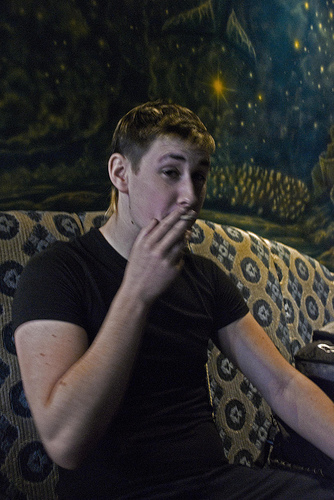

In [ ]:
#Visualise both the images & text present in the dataset
n = random.randint(1,len(annotations))
print("Caption: ",df["annotations"][n])
Image.open(df["Path"][n])

In [ ]:
#Create the vocabulary & the counter for the captions
vocabulary= (" ".join(df["Captions"])).split(" ")#write your code here


val_count=Counter(vocabulary)
val_count

Counter({'A': 21480,
         'child': 1444,
         'in': 18169,
         'a': 38770,
         'pink': 694,
         'dress': 329,
         'is': 9069,
         'climbing': 482,
         'up': 1198,
         'set': 99,
         'of': 6495,
         'stairs': 100,
         'an': 1870,
         'entry': 1,
         'way': 47,
         'girl': 3151,
         'going': 145,
         'into': 1045,
         'wooden': 278,
         'building': 450,
         'little': 1607,
         'playhouse': 4,
         'the': 14586,
         'to': 3006,
         'her': 1087,
         'cabin': 3,
         'black': 3459,
         'dog': 7717,
         'and': 8056,
         'spotted': 36,
         'are': 3364,
         'fighti': 4,
         'tri-colored': 12,
         'playing': 1941,
         'with': 7302,
         'each': 399,
         'other': 637,
         'on': 10331,
         'road': 343,
         'white': 3620,
         'brown': 2362,
         'spots': 27,
         'staring': 57,
         'at': 2809,

In [ ]:
#Visualise the top 30 occuring words in the captions

val_count.most_common(30)
#write your code here

[('a', 38770),
 ('A', 21480),
 ('in', 18169),
 ('the', 14586),
 ('on', 10331),
 ('is', 9069),
 ('and', 8056),
 ('dog', 7717),
 ('with', 7302),
 ('man', 6678),
 ('of', 6495),
 ('Two', 3962),
 ('white', 3620),
 ('black', 3459),
 ('boy', 3378),
 ('are', 3364),
 ('girl', 3151),
 ('woman', 3126),
 ('to', 3006),
 ('The', 2919),
 ('wearing', 2916),
 ('at', 2809),
 ('red', 2507),
 ('water', 2500),
 ('young', 2401),
 ('brown', 2362),
 ('people', 2359),
 ('his', 2255),
 ('blue', 2094),
 ('dogs', 1983)]

## Pre-Processing the captions
1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [ ]:
# create the tokenizer
#your code here

top_k = 5000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,
                                                  oov_token="<unk>",
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
tokenizer.fit_on_texts(annotations)

In [ ]:
# Create word-to-index and index-to-word mappings.

#your code here
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

In [ ]:
# Create a word count of your tokenizer to visulize the Top 30 occuring words after text processing

#your code here
text_seqs = tokenizer.texts_to_sequences(annotations)

In [ ]:
# Find the maximum length of any caption in our dataset
def calc_max_length(tensor):
    return max(len(t) for t in tensor)

In [ ]:
# Calculates the max_length, which is used to store the attention weights
max_length = calc_max_length(text_seqs)

In [ ]:
# Pad each vector to the max_length of the captions ^ store it to a vairable

cap_vector= tf.keras.preprocessing.sequence.pad_sequences(text_seqs, padding='post')#your code here

print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(40455, 35)


## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 

### FAQs on how to resize the images::
* Since you have a list which contains all the image path, you need to first convert them to a dataset using <i>tf.data.Dataset.from_tensor_slices</i>. Once you have created a dataset consisting of image paths, you need to apply a function to the dataset which will apply the necessary preprocessing to each image. 
* This function should resize them and also should do the necessary preprocessing that it is in correct format for InceptionV3.


In [ ]:
#write your code here to create the dataset consisting of image paths

#Image paths are already present in variable all_img_path

In [ ]:
#write your code here for creating the function. This function should return images & their path

def load_image(image_path):
    #write your pre-processing steps here
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path
  

In [ ]:
#write your code here for applying the function to the image path dataset, such that the transformed dataset should contain images & their path

# Get unique images from the list of all image paths
unique_img_names = sorted(set(all_img_path))

image_dataset = tf.data.Dataset.from_tensor_slices(unique_img_names)
image_dataset = image_dataset.map(
  load_image, num_parallel_calls=tf.data.AUTOTUNE).batch(16)


## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of the images using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [ ]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input = image_model.input #write code here to get the input of the image_model
hidden_layer = image_model.layers[-1].output#write code here to get the output of the image_model

image_features_extract_model = tf.keras.Model(new_input, hidden_layer) #build the final model using both input & output layer

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
# write the code to apply the feature_extraction model to your earlier created dataset which contained images & their respective paths
# Once the features are created, you need to reshape them such that feature shape is in order of (batch_size, 8*8, 2048)
for img, path in tqdm(image_dataset):
  batch_features = image_features_extract_model(img)
  batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))

  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())

NameError: ignored

### FAQs on how to store the features:
* You can store the features using a dictionary with the path as the key and values as the feature extracted by the inception net v3 model OR
* You can store using numpy(np.save) to store the resulting vector.

## Dataset creation
1.Apply train_test_split on both image path & captions to create the train & test list. Create the train-test spliit using 80-20 ratio & random state = 42

2.Create a function which maps the image path to their feature. 

3.Create a builder function to create train & test dataset & apply the function created earlier to transform the dataset

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 8*8, 2048)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [ ]:
#write your code here
img_to_cap_vector = collections.defaultdict(list)
for img, cap in zip(all_img_path, cap_vector):
    img_to_cap_vector[img].append(cap)

# Create training and validation sets using an 80-20 split randomly.
#As we need mapping for image and its respective captions - if we use a train_test_split which shuffles the data and mapping will be lost.
#If we keep Shuffle = False - then we will end up with training the data in a sequence
#To solve above two problems - we are manually doing the train test split
img_keys = list(img_to_cap_vector.keys())
random.shuffle(img_keys)

slice_index = int(len(img_keys)*0.8)
img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]

path_train = []
cap_train = []
for imgt in img_name_train_keys:
    capt_len = len(img_to_cap_vector[imgt])
    path_train.extend([imgt] * capt_len)
    cap_train.extend(img_to_cap_vector[imgt])

path_test = []
cap_test = []
for imgv in img_name_val_keys:
    capv_len = len(img_to_cap_vector[imgv])
    path_test.extend([imgv] * capv_len)
    cap_test.extend(img_to_cap_vector[imgv])

#path_train, path_test, cap_train, cap_test = train_test_split( #your code goes here)

In [ ]:
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(cap_train)))
print("Testing data for Captions: " + str(len(cap_test)))

Training data for images: 32360
Testing data for images: 8095
Training data for Captions: 32360
Testing data for Captions: 8095


In [ ]:
# Create a function which maps the image path to their feature. 
# This function will take the image_path & caption and return it's feature & respective caption.

def map_func(image, caption):# your input variable goes here):
    img_tensor = np.load(image.decode('utf-8')+'.npy') # write your code here to extract the features from the dictionary stored earlier
    return img_tensor, caption

### FAQs on how to load the features:
* You can load the features using the dictionary created earlier OR
* You can store using numpy(np.load) to load the feature vector.

In [ ]:
# create a builder function to create dataset which takes in the image path & captions as input
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier


BATCH_SIZE = 64
BUFFER_SIZE = 1000

def gen_dataset(images, captions): #your input variables
    
  # your code goes here to create the dataset & transform it
    dataset = tf.data.Dataset.from_tensor_slices((images, captions))

  # Use map to load the numpy files in parallel
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.AUTOTUNE)

  # Shuffle and batch
    dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    
    return dataset



In [ ]:
train_dataset=gen_dataset(path_train,cap_train)
test_dataset=gen_dataset(path_test,cap_test)

In [ ]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

(64, 64, 2048)
(64, 35)


## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [ ]:
embedding_dim = 256 
units = 512
vocab_size = top_k + 1 #top 5,000 words +1
train_num_steps = len(path_train) // BATCH_SIZE #len(total train images) // BATCH_SIZE
test_num_steps = len(path_test) // BATCH_SIZE #len(total test images) // BATCH_SIZE

### Encoder

In [ ]:
class Encoder(tf.keras.Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim, activation = tf.keras.activations.relu)  #build your Dense layer with relu activation
        
    def call(self, features):
        features =  self.dense(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        return features

In [ ]:

encoder=Encoder(embedding_dim)

### Attention model

In [ ]:
class Attention_model(tf.keras.Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units) #build your Dense layer
        self.W2 = tf.keras.layers.Dense(units) #build your Dense layer
        self.V = tf.keras.layers.Dense(1) #build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        hidden_with_time_axis = tf.expand_dims(hidden, 1)  # Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        score = self.V(tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis)))# build your score funciton to shape: (batch_size, 8*8, units)
        attention_weights =  tf.nn.softmax(score, axis=1) # extract your attention weights with shape: (batch_size, 8*8, 1)
        context_vector =  attention_weights * features #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=1) # reduce the shape to (batch_size, embedding_dim)
        

        return context_vector, attention_weights

### Decoder

In [ ]:
class Decoder(tf.keras.Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units) #iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim) #build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size) #build your Dense layer
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden) #create your context vector & attention weights from attention model
        embed = self.embed(x) # embed your input to shape: (batch_size, 1, embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1) # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [ ]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [ ]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)


## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [ ]:
optimizer = tf.keras.optimizers.Adam() #define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none') #define your loss object

In [ ]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [ ]:
checkpoint_path = "./checkpoints/train" "your checkpoint path"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [ ]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

* While creating the training step for your model, you will apply Teacher forcing.
* Teacher forcing is a technique where the target/real word is passed as the next input to the decoder instead of previous prediciton.

In [ ]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        #write your code here to do the training steps
        features = encoder(img_tensor)
        for i in range(1, target.shape[1]):
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)
            # teacher forcing step
            dec_input = tf.expand_dims(target[:, i], 1)
    
    avg_loss = (loss / int(target.shape[1]))
    trainable_variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, trainable_variables)

    optimizer.apply_gradients(zip(gradients, trainable_variables))
      
    return loss, avg_loss

* While creating the test step for your model, you will pass your previous prediciton as the next input to the decoder.

In [ ]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    
    #write your code here to do the testing steps
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1) 
    features = encoder(img_tensor)

    for i in range(1,target.shape[1]):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
        loss += loss_function(target[:,i], predictions)
        pred_id = tf.argmax(predictions[0])

        dec_input = tf.expand_dims([pred_id] * target.shape[0], 1)
        avg_loss = (loss / int(target.shape[1]))
    return loss, avg_loss

In [ ]:
def test_loss_cal(test_dataset):
    total_loss = 0

    #write your code to get the average loss result on your test data
    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss += t_loss
        avg_test_loss=total_loss / test_num_steps
    return avg_test_loss

In [ ]:
loss_plot = []
test_loss_plot = []
EPOCHS = 20

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()


  0%|          | 0/20 [00:00<?, ?it/s]

For epoch: 1, the train loss is 1.377, & test loss is 2.118
Time taken for 1 epoch 333.61199378967285 sec

Test loss has been reduced from 100.000 to 2.118



 10%|█         | 2/20 [09:33<1:31:38, 305.49s/it]

For epoch: 2, the train loss is 1.070, & test loss is 2.176
Time taken for 1 epoch 239.1952543258667 sec

For epoch: 3, the train loss is 0.969, & test loss is 2.107
Time taken for 1 epoch 217.23539781570435 sec

Test loss has been reduced from 2.118 to 2.107



 20%|██        | 4/20 [16:46<1:09:21, 260.09s/it]

For epoch: 4, the train loss is 0.899, & test loss is 2.170
Time taken for 1 epoch 215.70548486709595 sec




 25%|██▌       | 5/20 [20:22<1:01:42, 246.80s/it]

For epoch: 5, the train loss is 0.840, & test loss is 2.289
Time taken for 1 epoch 215.7723650932312 sec




 30%|███       | 6/20 [23:58<55:25, 237.56s/it]  

For epoch: 6, the train loss is 0.790, & test loss is 2.264
Time taken for 1 epoch 215.9826624393463 sec




 35%|███▌      | 7/20 [27:36<50:12, 231.76s/it]

For epoch: 7, the train loss is 0.746, & test loss is 2.307
Time taken for 1 epoch 218.18881559371948 sec




 40%|████      | 8/20 [31:14<45:32, 227.68s/it]

For epoch: 8, the train loss is 0.704, & test loss is 2.388
Time taken for 1 epoch 218.13205122947693 sec




 45%|████▌     | 9/20 [34:52<41:13, 224.88s/it]

For epoch: 9, the train loss is 0.666, & test loss is 2.414
Time taken for 1 epoch 218.32371759414673 sec




 50%|█████     | 10/20 [38:29<37:04, 222.47s/it]

For epoch: 10, the train loss is 0.630, & test loss is 2.499
Time taken for 1 epoch 216.8347578048706 sec




 55%|█████▌    | 11/20 [42:07<33:09, 221.04s/it]

For epoch: 11, the train loss is 0.597, & test loss is 2.593
Time taken for 1 epoch 217.68867564201355 sec




 60%|██████    | 12/20 [45:45<29:20, 220.01s/it]

For epoch: 12, the train loss is 0.565, & test loss is 2.660
Time taken for 1 epoch 217.56265306472778 sec




 65%|██████▌   | 13/20 [49:22<25:34, 219.24s/it]

For epoch: 13, the train loss is 0.538, & test loss is 2.719
Time taken for 1 epoch 217.41319704055786 sec




 70%|███████   | 14/20 [53:00<21:52, 218.80s/it]

For epoch: 14, the train loss is 0.510, & test loss is 2.823
Time taken for 1 epoch 217.75926327705383 sec




 75%|███████▌  | 15/20 [56:38<18:12, 218.55s/it]

For epoch: 15, the train loss is 0.486, & test loss is 2.887
Time taken for 1 epoch 217.95831751823425 sec




 80%|████████  | 16/20 [1:00:16<14:34, 218.56s/it]

For epoch: 16, the train loss is 0.464, & test loss is 2.952
Time taken for 1 epoch 218.54497170448303 sec




 85%|████████▌ | 17/20 [1:03:54<10:55, 218.39s/it]

For epoch: 17, the train loss is 0.442, & test loss is 3.009
Time taken for 1 epoch 217.9434471130371 sec




 90%|█████████ | 18/20 [1:07:31<07:15, 217.93s/it]

For epoch: 18, the train loss is 0.424, & test loss is 3.105
Time taken for 1 epoch 216.86469769477844 sec




 95%|█████████▌| 19/20 [1:11:09<03:37, 217.82s/it]

For epoch: 19, the train loss is 0.407, & test loss is 3.173
Time taken for 1 epoch 217.52684998512268 sec




100%|██████████| 20/20 [1:14:47<00:00, 224.36s/it]

For epoch: 20, the train loss is 0.391, & test loss is 3.264
Time taken for 1 epoch 217.99049973487854 sec



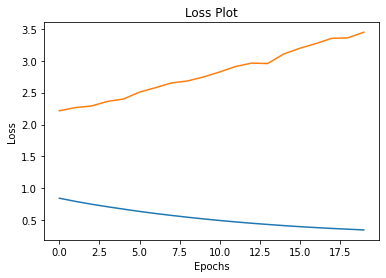

In [ ]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

#### NOTE: 
* Since there is a difference between the train & test steps ( Presence of teacher forcing), you may observe that the train loss is decreasing while your test loss is not. 
* This doesn't mean that the model is overfitting, as we can't compare the train & test results here, as both approach is different.
* Also, if you want to achieve better results you can run it more epochs, but the intent of this capstone is to give you an idea on how to integrate attention mechanism with E-D architecture for images. The intent is not to create the state of art model. 

## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

### Greedy Search

In [ ]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input) # Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val) # extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden) # get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        result.append(tokenizer.index_word[predicted_id]) #extract the predicted id(embedded value) which carries the max value
        #map the id to the word from tokenizer and append the value to the result list

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


### Beam Search(optional)

In [ ]:
def beam_evaluate(image, beam_index = #your value for beam index):

    #write your code to evaluate the result using beam search
                  
    return final_caption



In [ ]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [ ]:
rid = np.random.randint(0, len(path_test))
test_image = path_test[rid]
#test_image = './images/413231421_43833a11f5.jpg'
#real_caption = '<start> black dog is digging in the snow <end>'

real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
result, attention_plot,pred_test = evaluate(test_image)


real_caption=filt_text(real_caption)      


pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()

score = sentence_bleu(reference, candidate, weights=(1,0,0,0)) #set your weights)
print(f"BELU score: {score*100}")

print('Real Caption:', real_caption)
print('Prediction Caption:', pred_caption)
plot_attmap(result, attention_plot, test_image)


Image.open(test_image)

NameError: ignored

In [ ]:
captions=beam_evaluate(test_image)
print(captions)